<a href="https://colab.research.google.com/github/DivyanshRana1515/Deep-Learning-Lab-/blob/main/Exp_6_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam

import kagglehub

data_path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")
print("Dataset Path:", data_path)

# Adjust path if dataset has folder inside
if "Butterfly Image Classification" in os.listdir(data_path):
    data_path = os.path.join(data_path, "Butterfly Image Classification")

print("Using data folder:", data_path)

Using Colab cache for faster access to the 'butterfly-image-classification' dataset.
Dataset Path: /kaggle/input/butterfly-image-classification
Using data folder: /kaggle/input/butterfly-image-classification


In [2]:
X, y = [], []
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            continue
        img = cv2.resize(img, (64, 64))     # resize to 64x64
        X.append(img)
        y.append(class_name)

X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

encoder = LabelBinarizer()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset loaded:", X.shape, y.shape)
print("Classes:", encoder.classes_)

Dataset loaded: (9285, 64, 64, 3) (9285, 1)
Classes: ['test' 'train']


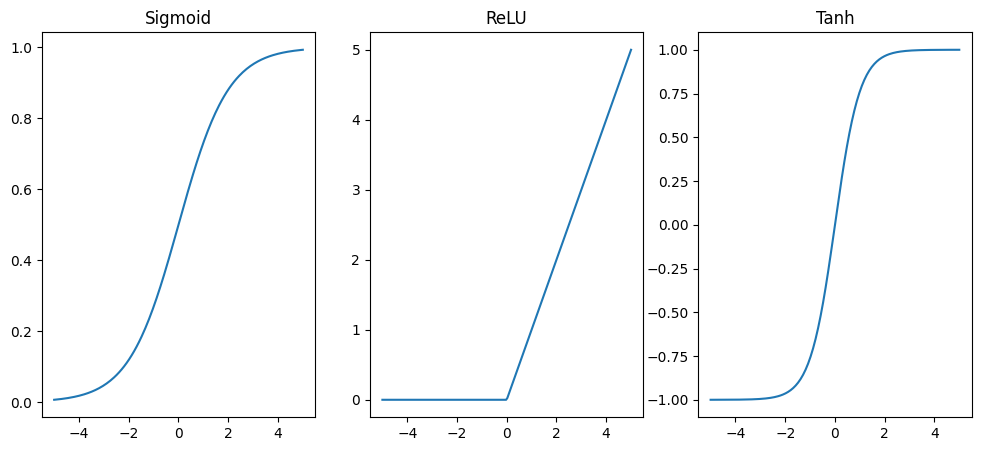

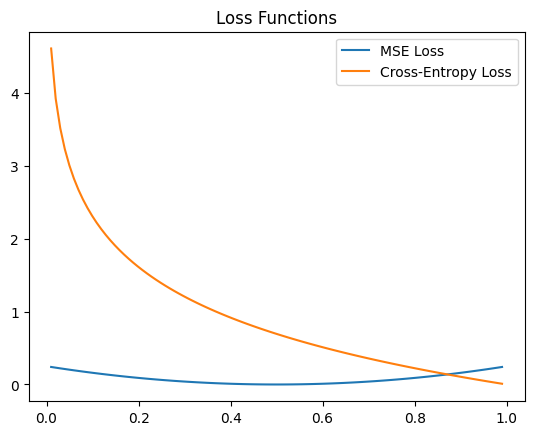

In [3]:
x_vals = np.linspace(-5, 5, 200)

def sigmoid(x): return 1/(1+np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def softmax(x): return np.exp(x) / np.sum(np.exp(x), axis=0)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot(x_vals, sigmoid(x_vals)); plt.title("Sigmoid")
plt.subplot(1,3,2)
plt.plot(x_vals, relu(x_vals)); plt.title("ReLU")
plt.subplot(1,3,3)
plt.plot(x_vals, tanh(x_vals)); plt.title("Tanh")
plt.show()

# Loss Functions
y_true = np.array([0,1,0,1])
y_pred = np.linspace(0.01, 0.99, 100)

mse = [(yt - yp)**2 for yt, yp in zip([0.5]*100, y_pred)]
cross_entropy = [- (yt*np.log(yp) + (1-yt)*np.log(1-yp)) for yt, yp in zip([1]*100, y_pred)]

plt.plot(y_pred, mse, label="MSE Loss")
plt.plot(y_pred, cross_entropy, label="Cross-Entropy Loss")
plt.legend(); plt.title("Loss Functions")
plt.show()

In [5]:
# Sample 1-hidden-layer NN for XOR
X_demo = np.array([[0,0],[0,1],[1,0],[1,1]])
Y_demo = np.array([[0],[1],[1],[0]])

# Small network with manual backprop
class SimpleNN:
    def __init__(self):
        self.W1 = np.random.randn(2,2)
        self.b1 = np.zeros((1,2))
        self.W2 = np.random.randn(2,1)
        self.b2 = np.zeros((1,1))

    def sigmoid(self, z): return 1/(1+np.exp(-z))
    def sigmoid_deriv(self, a): return a*(1-a)

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, Y, lr=0.1):
        m = len(Y)
        dz2 = self.a2 - Y
        dW2 = (self.a1.T @ dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = (dz2 @ self.W2.T) * self.sigmoid_deriv(self.a1)
        dW1 = (X.T @ dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # update
        self.W1 -= lr*dW1; self.b1 -= lr*db1
        self.W2 -= lr*dW2; self.b2 -= lr*db2

# Train demo network
nn_demo = SimpleNN()
for epoch in range(10000):
    nn_demo.forward(X_demo)
    nn_demo.backward(X_demo, Y_demo)
preds = (nn_demo.forward(X_demo) > 0.5).astype(int)
print("Manual Backprop XOR Predictions:", preds.T)

Manual Backprop XOR Predictions: [[0 1 1 0]]



Training with SGD optimizer...
Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5198 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3076 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3070 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3006 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3011 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2909 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3117 - loss: nan - val_accuracy: 0.2914 - val_loss: nan
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3067 - loss: nan - val_accuracy: 0.2914 - val_loss: nan


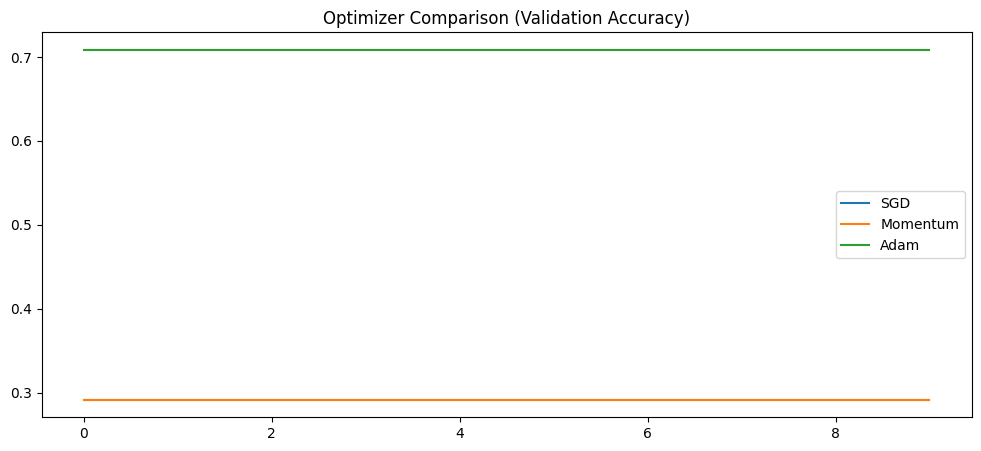

In [6]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(64,64,3)),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(y.shape[1], activation='softmax')
    ])
    return model

optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001)
}

histories = {}
for name, opt in optimizers.items():
    model = build_model()
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    print(f"\nTraining with {name} optimizer...")
    hist = model.fit(X_train, y_train, epochs=10, batch_size=64,
                     validation_split=0.2, verbose=1)
    histories[name] = hist

# Plot optimizer comparison
plt.figure(figsize=(12,5))
for name, hist in histories.items():
    plt.plot(hist.history["val_accuracy"], label=name)
plt.legend(); plt.title("Optimizer Comparison (Validation Accuracy)")
plt.show()